In [159]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
%matplotlib inline

beta = 100.
U = 0.1
t = 1.
N = 31 # odd
freq = np.pi/beta * np.arange(-N, N+2, 2) 
a = 1.
def G_w(w):
    return 1. / ( 1j*w + a )

def G_t(t):
    return 1./ beta *sum( np.exp(-1j*t*w)*G_w(w) for w in freq)

def G_trick(t):
    return - 0.5 + 1./ beta *sum( np.exp(-1j*t*w)*( G_w(w)-1./(1j*w) ) for w in freq)
    

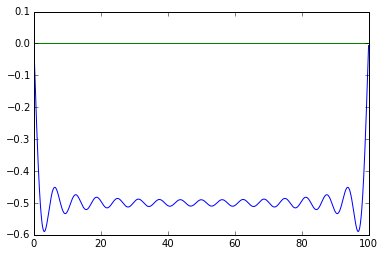

In [160]:
def test_t(t):
    return 1./ beta *sum( np.exp(-1j*t*w)/(1j*w) for w in freq)
times = np.arange(0,beta,1./50)
plt.plot(times, test_t(times).real)
plt.plot(times, test_t(times).imag)

In [161]:
def Fourier_w(w,func):
    temp1 = quad(lambda t: np.cos(t*w)*func(t).real - np.sin(t*w)*func(t).imag, 0, beta)[0]
    temp2 = quad(lambda t: np.cos(t*w)*func(t).imag + np.sin(t*w)*func(t).real, 0, beta)[0]
    return temp1 + 1j*temp2

In [162]:
for w in freq[0:2*N:N/4]:
    temp1 = Fourier_w(w,G_t)
    temp2 = Fourier_w(w,G_trick)
    temp3 = G_w(w)
    #print temp1, "--", temp2, "--", abs(temp1-temp3)
    print abs(temp1-temp3), "--", abs(temp2 -temp3)

1.00074151062e-15 -- 4.05535460609e-15
1.55530318914e-15 -- 7.94566072274e-15
1.23254758129e-15 -- 4.34487805524e-15
1.7763568394e-15 -- 6.17971517801e-15
4.0826178012e-15 -- 7.44863677715e-15


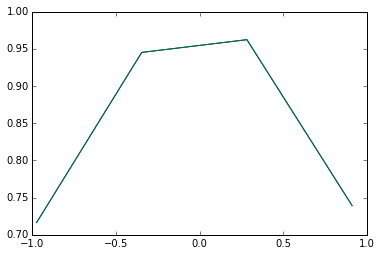

In [163]:
freqpart = freq[:-1:10]
plt.plot(freqpart,map(lambda w: abs(Fourier_w(w,G_trick)), freqpart))
plt.plot(freqpart,map(lambda w: abs(G_w(w)), freqpart))

In [1]:
2+2

4